In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # data visualization library based on matplotlib.
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans # for machine learning and statistical modeling 
from array import array
import warnings
import os
import datetime
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)


In [2]:
#load libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#read and set dataset = df
df = pd.read_csv(r'C:/Users/User/Documents/Python Scripts/k-means/dataset2.csv')

#explore dataset 
df.head() #top 5 rows
# df.shape #number of (rows, columns)

#descriptive statistics of data
# df.describe().transpose()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541910, 8)

In [4]:
#total NULL values in each column
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [5]:
#drop all rows with NULL values
df = df.dropna()

#drop negative values for Quantity
df = df[df['Quantity'] > 0]

#remaining (rows, columns)
df.shape

(397925, 8)

In [6]:
customer = df[['Customer ID']]
u_customer = np.unique(customer)
len(u_customer)

4339

In [7]:
#Monetary

monetary_value = [] #empty list to store total money spent 

for x in u_customer:   #iterate through unique customers
    row_customer = df.loc[df['Customer ID'] == x]  #iterate unique customers
    unit_price = row_customer.Price  #store price for unique customer 
    quantity = row_customer.Quantity #store quantity for unique customer 
    invoice_money = unit_price * quantity #calculate money spent for each row
    total_money = invoice_money.sum() #sum total money spent 
    monetary_value.append(total_money) #store total money spent 


cus_mon = {
    'Customer ID': u_customer,
    'Total Money Spent': monetary_value,
}    

m_analysis = pd.DataFrame(cus_mon, columns = ['Customer ID', 'Total Money Spent'])

m_analysis

,Customer ID,Total Money Spent
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [8]:
# Frequency

items = [] #empty list to store all invoices of each  customer 
invoices = [] #empty list to store all unique invoices of each customer

for x in u_customer: #iterate through unique customers
    row_customer = df.loc[df['Customer ID'] == x]
    inv = row_customer.Invoice #select all invoices for each customer 
    s_inv = set(inv)  #select unique invoices each customer 
    f_inv = inv.count() #count total invoices for each customer 
    u_inv = len(s_inv) #count total unique invoices
    items.append(f_inv) #add invoices to empty item list
    invoices.append(u_inv) #add invoices to empty invoice list

    
inv_record = {
    'Customer ID': u_customer,
    'Items': items,
    'Invoices': invoices
}

f_analysis = pd.DataFrame(inv_record, columns = ['Customer ID', 'Items', 'Invoices'])

f_analysis

,Customer ID,Items,Invoices
0,12346.0,1,1
1,12347.0,182,7
2,12348.0,31,4
3,12349.0,73,1
4,12350.0,17,1
...,...,...,...
4334,18280.0,10,1
4335,18281.0,7,1
4336,18282.0,12,2
4337,18283.0,756,16


In [9]:
#Recency

rec = []  #empty list to store number of days since last purchase

date_from = ['1/1/2012  00:00']   #present date, compared with purchased date
date_from = pd.to_datetime(date_from)

#loop unique customers
for x in u_customer:
    row_customer = df.loc[df['Customer ID'] == x]  #select rows with Customer ID 
    inv_dates = row_customer.InvoiceDate  #store invoice date
    recent_date = max(inv_dates)   #find latest purchase date 
    recent_date = pd.to_datetime(recent_date)
    num_days = date_from - recent_date    #calculate number of days 
    conv_days = num_days.days[0]    
    rec.append(conv_days)       #store number of days

recency = {
    'Customer ID': u_customer,
    'Days Since Last Purchase': rec
}


r_analysis = pd.DataFrame(recency, columns = ['Customer ID', 'Days Since Last Purchase'])
r_analysis

,Customer ID,Days Since Last Purchase
0,12346.0,347
1,12347.0,151
2,12348.0,97
3,12349.0,40
4,12350.0,332
...,...,...
4334,18280.0,299
4335,18281.0,202
4336,18282.0,148
4337,18283.0,117


In [10]:
rfm_records = {
    'Customer ID': u_customer,
    'Items': items,
    'Invoices': invoices,
    'Total Money Spent': monetary_value,
    'Days Since Last Purchase': rec
}

rfm_analysis = pd.DataFrame(rfm_records, columns=['Customer ID', 
                                                  'Items', 'Invoices', 
                                                  'Total Money Spent', 
                                                  'Days Since Last Purchase'])
rfm_analysis

,Customer ID,Items,Invoices,Total Money Spent,Days Since Last Purchase
0,12346.0,1,1,77183.60,347
1,12347.0,182,7,4310.00,151
2,12348.0,31,4,1797.24,97
3,12349.0,73,1,1757.55,40
4,12350.0,17,1,334.40,332
...,...,...,...,...,...
4334,18280.0,10,1,180.60,299
4335,18281.0,7,1,80.82,202
4336,18282.0,12,2,178.05,148
4337,18283.0,756,16,2094.88,117


In [11]:
rfm_analysis.describe() #check percentile of each feature

,Customer ID,Items,Invoices,Total Money Spent,Days Since Last Purchase
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,91.708919,4.271952,2053.797166,160.634478
std,1721.889758,228.792813,7.705493,8988.247836,92.791363
min,12346.000000,1.000000,1.000000,0.000000,22.000000
25%,13812.500000,17.000000,1.000000,307.245000,97.000000
50%,15299.000000,41.000000,2.000000,674.450000,131.000000
75%,16778.500000,100.000000,5.000000,1661.640000,217.000000
max,18287.000000,7847.000000,210.000000,280206.020000,395.000000


In [13]:
qtile = rfm_analysis.quantile([0.2, 0.4, 0.6, 0.8])

In [14]:
qtile = rfm_analysis.quantile([0.2, 0.4, 0.6, 0.8]) #quantile function to split records into percentile
qtile_mon = qtile['Total Money Spent'] 

monetary_rank = []  #list for storing M rank

#monetary value rank computing loop
for x in rfm_analysis['Total Money Spent']:
    if x < qtile_mon[0.2]:
        m_rank = 1
    elif ((qtile_mon[0.2] <= x) & (x < qtile_mon[0.4])):
        m_rank = 2
    elif ((qtile_mon[0.4] <= x) & (x < qtile_mon[0.6])):
        m_rank = 3
    elif ((qtile_mon[0.6] <= x) & (x < qtile_mon[0.8])):
        m_rank = 4
    elif qtile_mon[0.8]<=x:
        m_rank = 5
    monetary_rank.append(m_rank) #add rank to list 


In [15]:
qtile = rfm_analysis.quantile([0.2, 0.4, 0.6, 0.8])
qtile_freq = qtile['Invoices']

frequency_rank = []

#frequency value rank
for x in rfm_analysis['Invoices']:
    if x < qtile_freq[0.2]:
        f_rank = 1
    elif ((qtile_freq[0.2] <= x) & (x < qtile_freq[0.4])):
        f_rank = 2
    elif ((qtile_freq[0.4] <= x) & (x < qtile_freq[0.6])):
        f_rank = 3
    elif ((qtile_freq[0.6] <= x) & (x < qtile_freq[0.8])):
        f_rank = 4
    elif qtile_freq[0.8]<=x:
        f_rank = 5
    frequency_rank.append(f_rank)

In [16]:
qtile = rfm_analysis.quantile([0.2, 0.4, 0.6, 0.8])
qtile_rec = qtile['Days Since Last Purchase']

recency_rank = []

#recency value rank
for x in rfm_analysis['Days Since Last Purchase']:
    if x >= qtile_rec[0.8]:
        r_rank = 1
    elif ((qtile_rec[0.6] <= x) & (x < qtile_rec[0.8])):
        r_rank = 2
    elif ((qtile_rec[0.4] <= x) & (x < qtile_rec[0.6])):
        r_rank = 3
    elif ((qtile_rec[0.2] <= x) & (x < qtile_rec[0.4])):
        r_rank = 4
    elif qtile_rec[0.2] > x:
        r_rank = 5
    recency_rank.append(r_rank)

In [17]:
recency_rank
frequency_rank
monetary_rank

rfm_analysis['Recency Rank'] = recency_rank
rfm_analysis['Frequency Rank'] = frequency_rank
rfm_analysis['Monetary Rank'] = monetary_rank

rfm_analysis


,Customer ID,Items,Invoices,Total Money Spent,Days Since Last Purchase,Recency Rank,Frequency Rank,Monetary Rank
0,12346.0,1,1,77183.60,347,1,2,5
1,12347.0,182,7,4310.00,151,3,5,5
2,12348.0,31,4,1797.24,97,4,4,4
3,12349.0,73,1,1757.55,40,5,2,4
4,12350.0,17,1,334.40,332,1,2,2
...,...,...,...,...,...,...,...,...
4334,18280.0,10,1,180.60,299,1,2,1
4335,18281.0,7,1,80.82,202,2,2,1
4336,18282.0,12,2,178.05,148,3,3,1
4337,18283.0,756,16,2094.88,117,3,5,5


In [18]:
for x in rfm_analysis:
    rfm_analysis['RFM Score'] = rfm_analysis['Recency Rank'] + rfm_analysis['Frequency Rank'] + rfm_analysis['Monetary Rank']

rfm_analysis

,Customer ID,Items,Invoices,Total Money Spent,Days Since Last Purchase,Recency Rank,Frequency Rank,Monetary Rank,RFM Score
0,12346.0,1,1,77183.60,347,1,2,5,8
1,12347.0,182,7,4310.00,151,3,5,5,13
2,12348.0,31,4,1797.24,97,4,4,4,12
3,12349.0,73,1,1757.55,40,5,2,4,11
4,12350.0,17,1,334.40,332,1,2,2,5
...,...,...,...,...,...,...,...,...,...
4334,18280.0,10,1,180.60,299,1,2,1,4
4335,18281.0,7,1,80.82,202,2,2,1,5
4336,18282.0,12,2,178.05,148,3,3,1,7
4337,18283.0,756,16,2094.88,117,3,5,5,13


In [19]:
new  = []
country  = [] #list to store country names
    
for x in rfm_analysis['Customer ID']: #iterate for every customer ID
    line = df.loc[df['Customer ID'] == x] #select country for all rows
    cou = line.Country  #select unique country for each customer ID, or simply choose 1 country
    u_cou = cou.iloc[0]  #select first country for each customer ID, or simply choose 1 country
    new.append(u_cou) #add to country list

rfm_analysis['Country'] = new

rfm_analysis

,Customer ID,Items,Invoices,Total Money Spent,Days Since Last Purchase,Recency Rank,Frequency Rank,Monetary Rank,RFM Score,Country
0,12346.0,1,1,77183.60,347,1,2,5,8,United Kingdom
1,12347.0,182,7,4310.00,151,3,5,5,13,Iceland
2,12348.0,31,4,1797.24,97,4,4,4,12,Finland
3,12349.0,73,1,1757.55,40,5,2,4,11,Italy
4,12350.0,17,1,334.40,332,1,2,2,5,Norway
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,10,1,180.60,299,1,2,1,4,United Kingdom
4335,18281.0,7,1,80.82,202,2,2,1,5,United Kingdom
4336,18282.0,12,2,178.05,148,3,3,1,7,United Kingdom
4337,18283.0,756,16,2094.88,117,3,5,5,13,United Kingdom


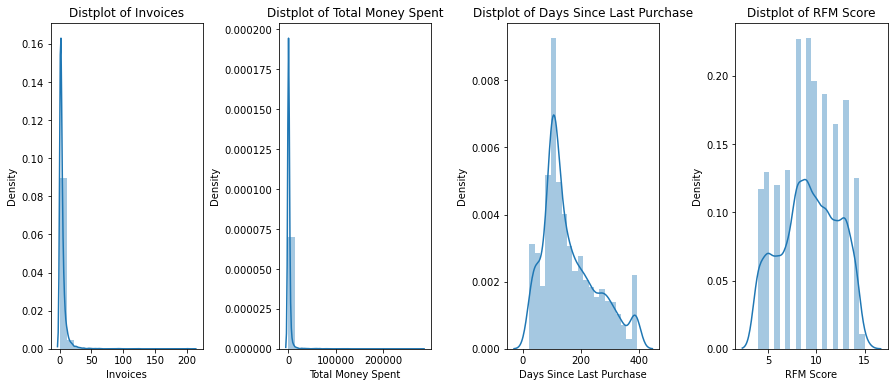

In [20]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Invoices', 'Total Money Spent' , 'Days Since Last Purchase', 'RFM Score']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(rfm_analysis[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

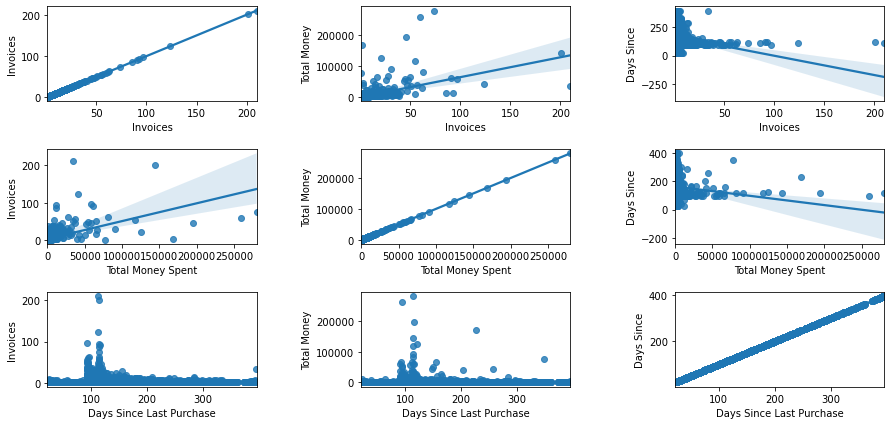

In [21]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Invoices', 'Total Money Spent', 'Days Since Last Purchase']:
    for y in ['Invoices', 'Total Money Spent', 'Days Since Last Purchase']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = rfm_analysis)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

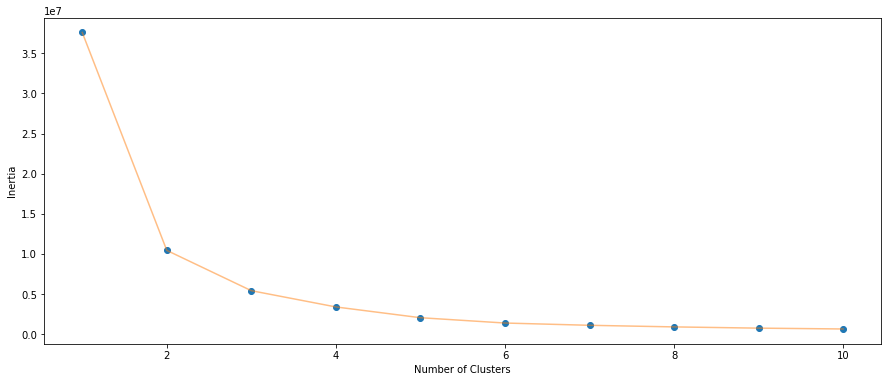

In [22]:
# Frequency & Recency
X1 = rfm_analysis[['Invoices' , 'Days Since Last Purchase']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [23]:
# select 4 clusters 
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

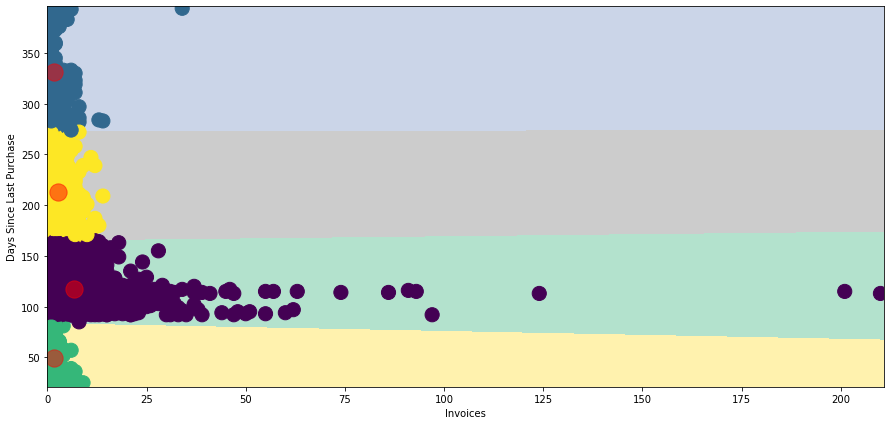

In [24]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Invoices' ,y = 'Days Since Last Purchase' , data = rfm_analysis, c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Days Since Last Purchase') , plt.xlabel('Invoices')
plt.show()

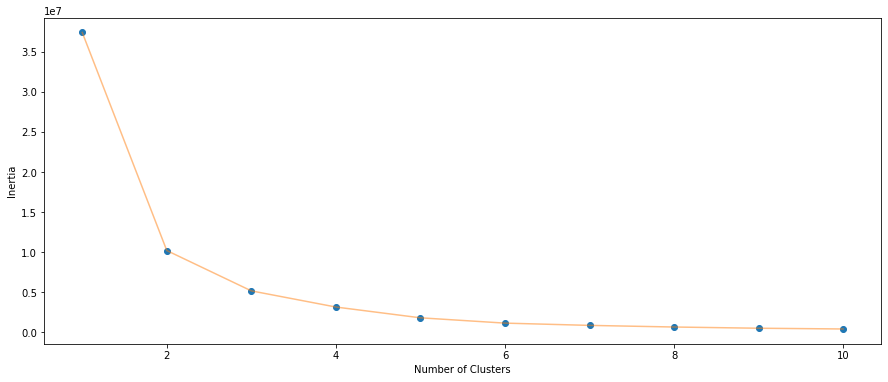

In [25]:
# Recency & RFM Score
X1 = rfm_analysis[['Days Since Last Purchase', 'RFM Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [26]:
# select 4 clusters 
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

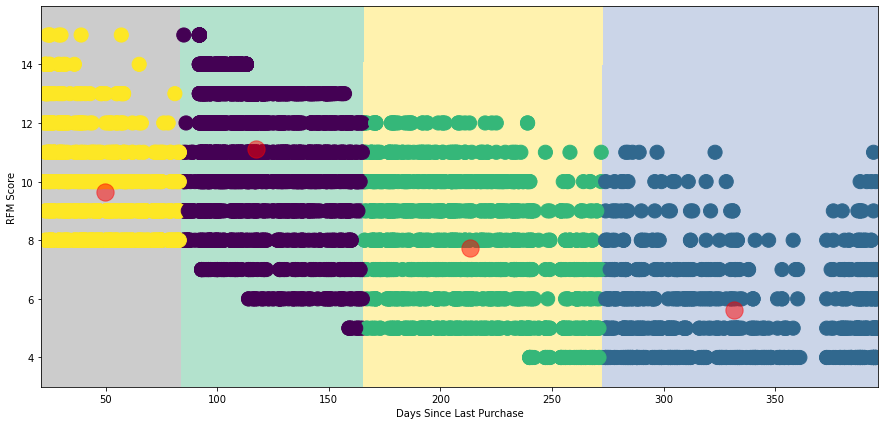

In [27]:
# Recency & RFM Score
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Days Since Last Purchase' ,y = 'RFM Score' , data = rfm_analysis, c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('RFM Score') , plt.xlabel('Days Since Last Purchase')
plt.show()

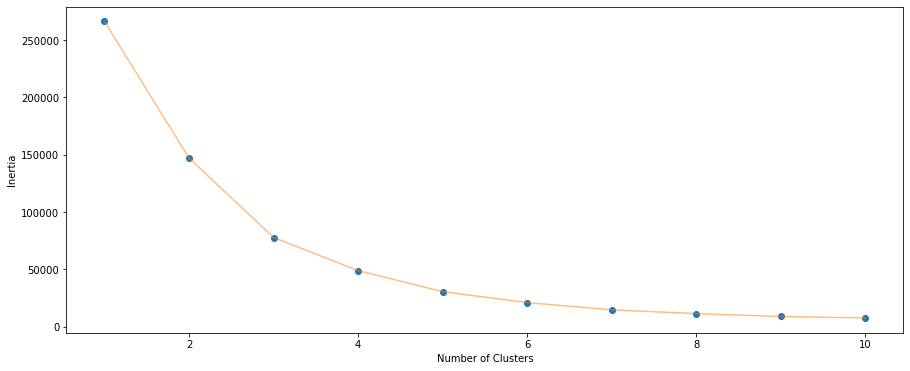

In [28]:
# Frequency & Monetary Rank
X1 = rfm_analysis[['Invoices', 'Monetary Rank']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [29]:
# select 4 clusters 
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

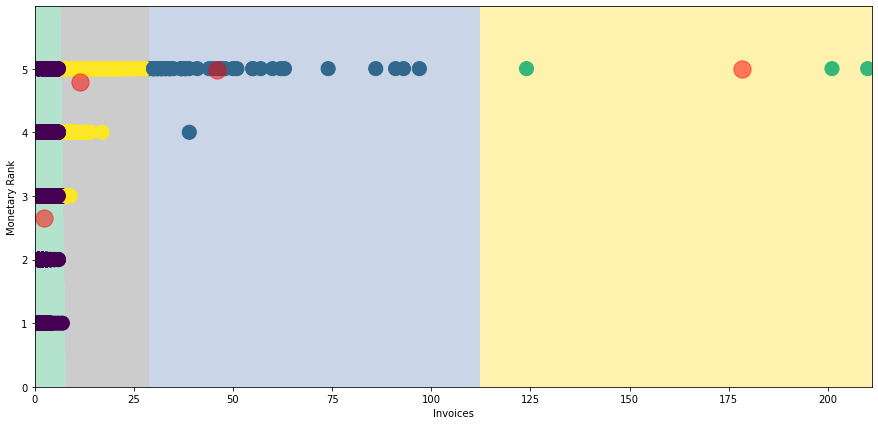

In [30]:
# Frequency & Monetary Rank
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Invoices' ,y = 'Monetary Rank' , data = rfm_analysis, c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Monetary Rank') , plt.xlabel('Invoices')
plt.show()

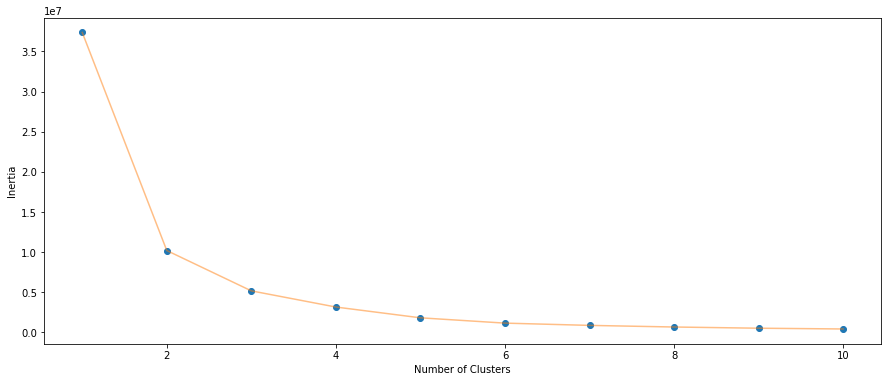

In [31]:
# Recency & Monetary Rank
X1 = rfm_analysis[['Days Since Last Purchase', 'Monetary Rank']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [32]:
# select 4 clusters 
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

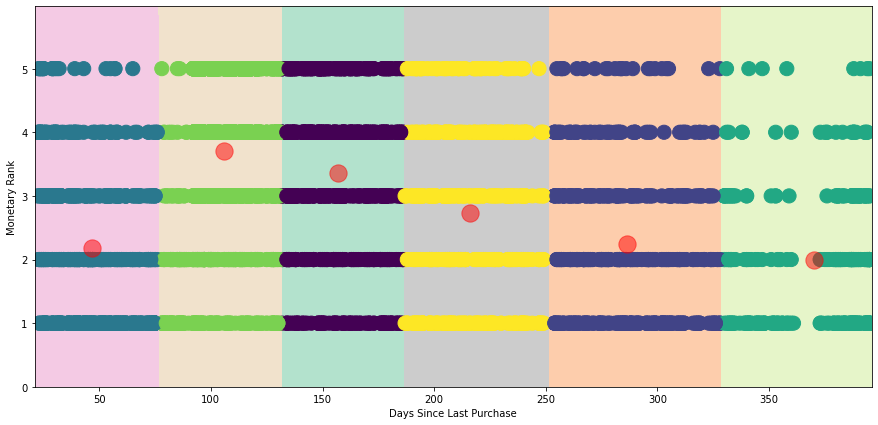

In [33]:
# Recency & Monetary Rank
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Days Since Last Purchase' ,y = 'Monetary Rank' , data = rfm_analysis, c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Monetary Rank') , plt.xlabel('Days Since Last Purchase')
plt.show()

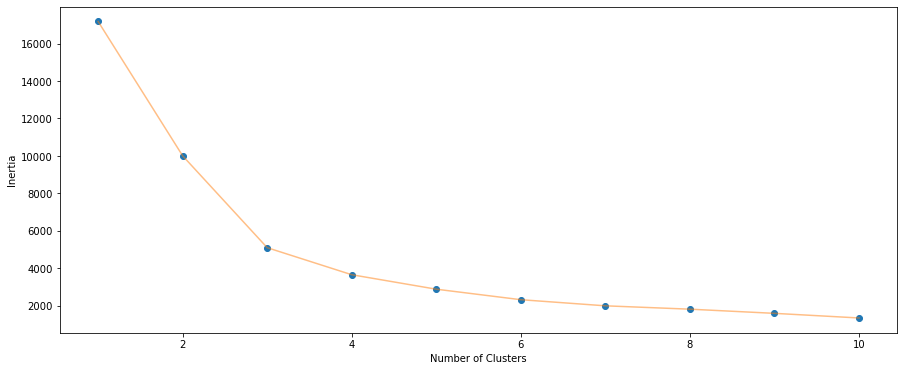

In [34]:
# Recency rank & Monetary Rank
X1 = rfm_analysis[['Recency Rank', 'Monetary Rank']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [35]:
# select 5 clusters 
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

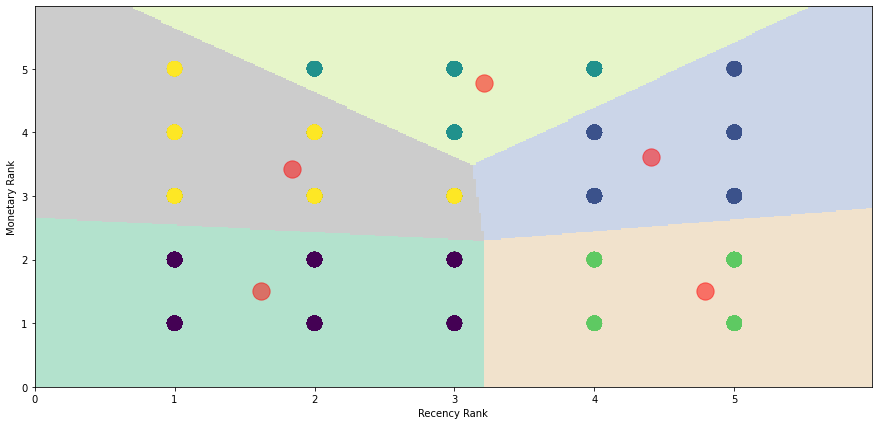

In [36]:
# Recency rank & Monetary rank
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Recency Rank' ,y = 'Monetary Rank' , data = rfm_analysis, c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Monetary Rank') , plt.xlabel('Recency Rank')
plt.show()

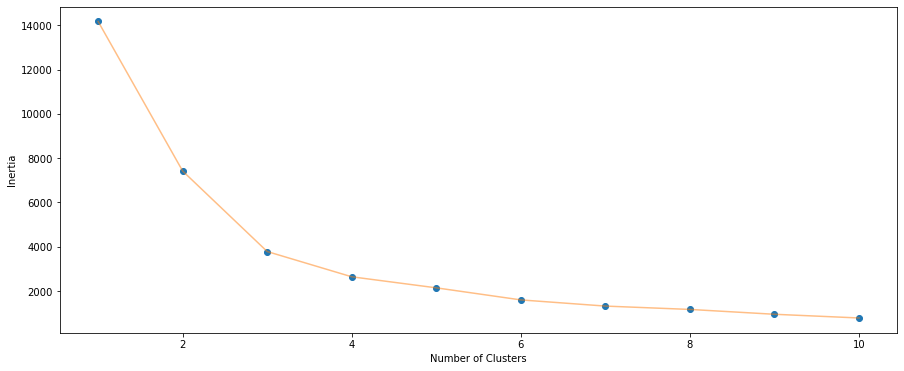

In [37]:
# Recency rank & Frequency Rank
X1 = rfm_analysis[['Recency Rank', 'Frequency Rank']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

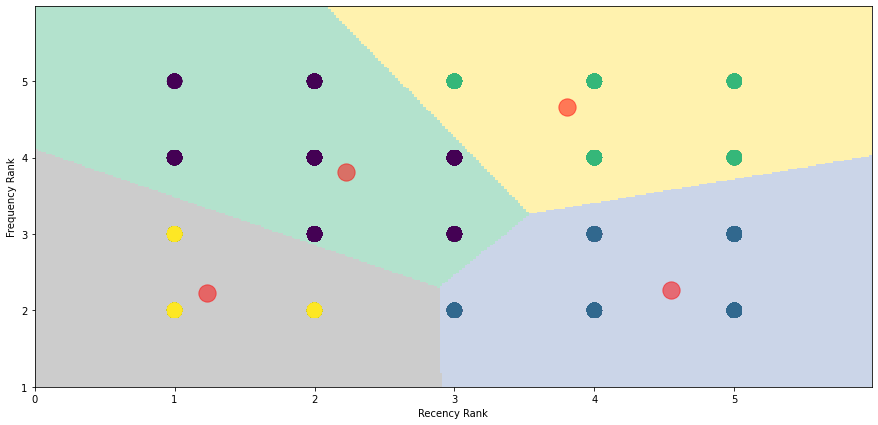

In [38]:
# select 4 clusters 
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

# Recency rank & Monetary rank
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Recency Rank' ,y = 'Frequency Rank' , data = rfm_analysis, c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Frequency Rank') , plt.xlabel('Recency Rank')
plt.show()

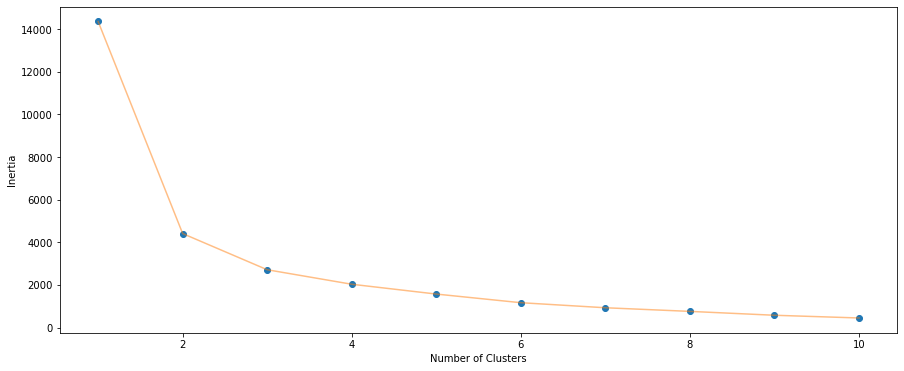

In [39]:
# Frequency rank & Monetary Rank
X1 = rfm_analysis[['Frequency Rank', 'Monetary Rank']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

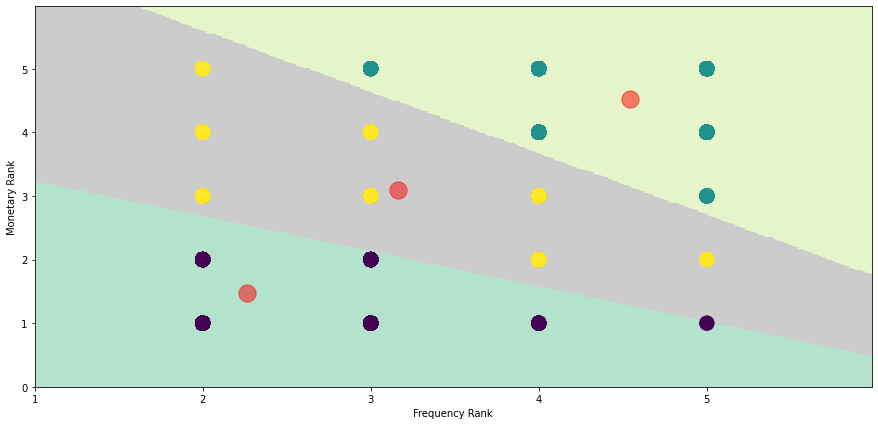

In [40]:
# select 3 clusters 
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

# Frequency rank & Monetary rank
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Frequency Rank' ,y = 'Monetary Rank' , data = rfm_analysis, c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Monetary Rank') , plt.xlabel('Frequency Rank')
plt.show()

In [41]:
rfm_analysis

,Customer ID,Items,Invoices,Total Money Spent,Days Since Last Purchase,Recency Rank,Frequency Rank,Monetary Rank,RFM Score,Country
0,12346.0,1,1,77183.60,347,1,2,5,8,United Kingdom
1,12347.0,182,7,4310.00,151,3,5,5,13,Iceland
2,12348.0,31,4,1797.24,97,4,4,4,12,Finland
3,12349.0,73,1,1757.55,40,5,2,4,11,Italy
4,12350.0,17,1,334.40,332,1,2,2,5,Norway
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,10,1,180.60,299,1,2,1,4,United Kingdom
4335,18281.0,7,1,80.82,202,2,2,1,5,United Kingdom
4336,18282.0,12,2,178.05,148,3,3,1,7,United Kingdom
4337,18283.0,756,16,2094.88,117,3,5,5,13,United Kingdom


In [42]:
cname = rfm_analysis['Country']
d = {ni: indi for indi, ni in enumerate(set(cname))}
numbers = [d[ni] for ni in cname]
rfm_analysis['Country Code'] = numbers 


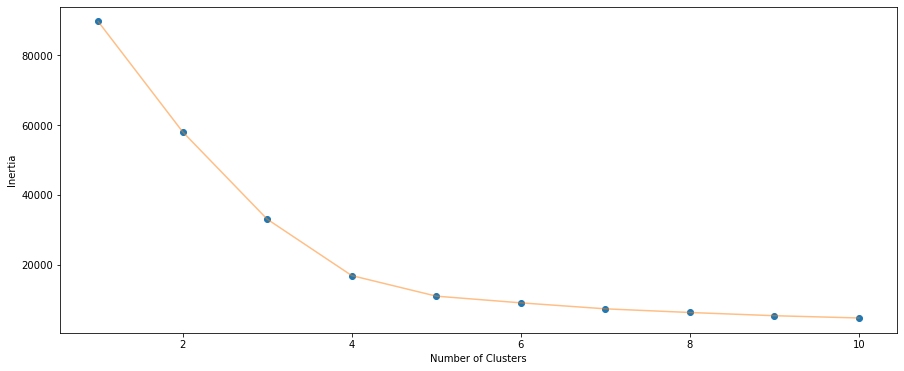

In [43]:
# Recency rank & Monetary Rank
X1 = rfm_analysis[['RFM Score', 'Country Code']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

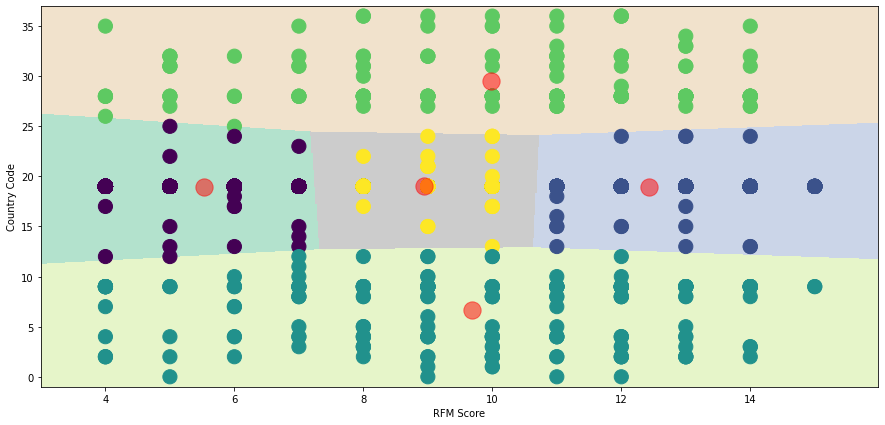

In [44]:
# select 5 clusters 
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

# Frequency rank & Monetary rank
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'RFM Score' ,y = 'Country Code' , data = rfm_analysis, c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Country Code') , plt.xlabel('RFM Score')
plt.show()

In [45]:
rfm_analysis[['Country', 'Country Code']]

,Country,Country Code
0,United Kingdom,19
1,Iceland,34
2,Finland,3
3,Italy,31
4,Norway,27
...,...,...
4334,United Kingdom,19
4335,United Kingdom,19
4336,United Kingdom,19
4337,United Kingdom,19


In [46]:
u_cun = np.unique(rfm_analysis['Country'])
u_cc = np.unique(rfm_analysis['Country Code'])

coc = {
    'Country': u_cun,
    'Country Code': u_cc
}

country_code = pd.DataFrame(coc, columns = ['Country', 'Country Code'])
country_code

,Country,Country Code
0,Australia,0
1,Austria,1
2,Bahrain,2
3,Belgium,3
4,Brazil,4
5,Canada,5
6,Channel Islands,6
7,Cyprus,7
8,Czech Republic,8
9,Denmark,9


In [47]:
rfm_analysis

,Customer ID,Items,Invoices,Total Money Spent,Days Since Last Purchase,Recency Rank,Frequency Rank,Monetary Rank,RFM Score,Country,Country Code
0,12346.0,1,1,77183.60,347,1,2,5,8,United Kingdom,19
1,12347.0,182,7,4310.00,151,3,5,5,13,Iceland,34
2,12348.0,31,4,1797.24,97,4,4,4,12,Finland,3
3,12349.0,73,1,1757.55,40,5,2,4,11,Italy,31
4,12350.0,17,1,334.40,332,1,2,2,5,Norway,27
...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,10,1,180.60,299,1,2,1,4,United Kingdom,19
4335,18281.0,7,1,80.82,202,2,2,1,5,United Kingdom,19
4336,18282.0,12,2,178.05,148,3,3,1,7,United Kingdom,19
4337,18283.0,756,16,2094.88,117,3,5,5,13,United Kingdom,19
